In [1]:
%load_ext autoreload
%autoreload 2
import itertools 
import math
import os
import pickle as pkl
from typing import List, Dict, Any

import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 250
import dvu  # for visualization

# change working directory to project root
if os.getcwd().split('/')[-1] != 'imodels':
    os.chdir('..')
from notebooks import viz

def get_comparison_result(path: str, estimator_name: str, test=False) -> Dict[str, Any]:
    if test:
        result_file = path + 'test/' + f'{estimator_name}_test_comparisons.pkl'
    else:
        result_file = path + 'val/' + f'{estimator_name}_comparisons.pkl'
    return pkl.load(open(result_file, 'rb'))    
    
MODEL_COMPARISON_PATH = 'tests/comparison_data/'
datasets = [
        ("breast-cancer", 13),
        ("breast-w", 15),
        ("credit-g", 31),
        ("haberman", 43),
        ("heart", 1574),
        ("labor", 4),
        ("vote", 56),
    ]

# dataset stats

In [2]:
metadata = []
columns = ['name', 'samples', 'features', 'class 0 ct', 'class 1 ct', 'majority class %']
for dataset_name, data_id in datasets:
    dataset = fetch_openml(data_id=data_id, as_frame=False)
    shape = dataset.data.shape
    class_counts = np.unique(dataset.target, return_counts=True)[1]
    metadata.append([dataset_name, shape[0], shape[1], class_counts[0], class_counts[1], np.max(class_counts) / np.sum(class_counts)])
pd.DataFrame(metadata, columns=columns).set_index('name') 

,samples,features,class 0 ct,class 1 ct,majority class %
name,,,,,
breast-cancer,286,9,201,85,0.702797
breast-w,699,9,458,241,0.655222
credit-g,1000,20,300,700,0.700000
haberman,306,3,225,81,0.735294
heart,270,13,150,120,0.555556
labor,57,16,20,37,0.649123
vote,435,16,267,168,0.613793


# complexity vs. ROC Area plot for all models

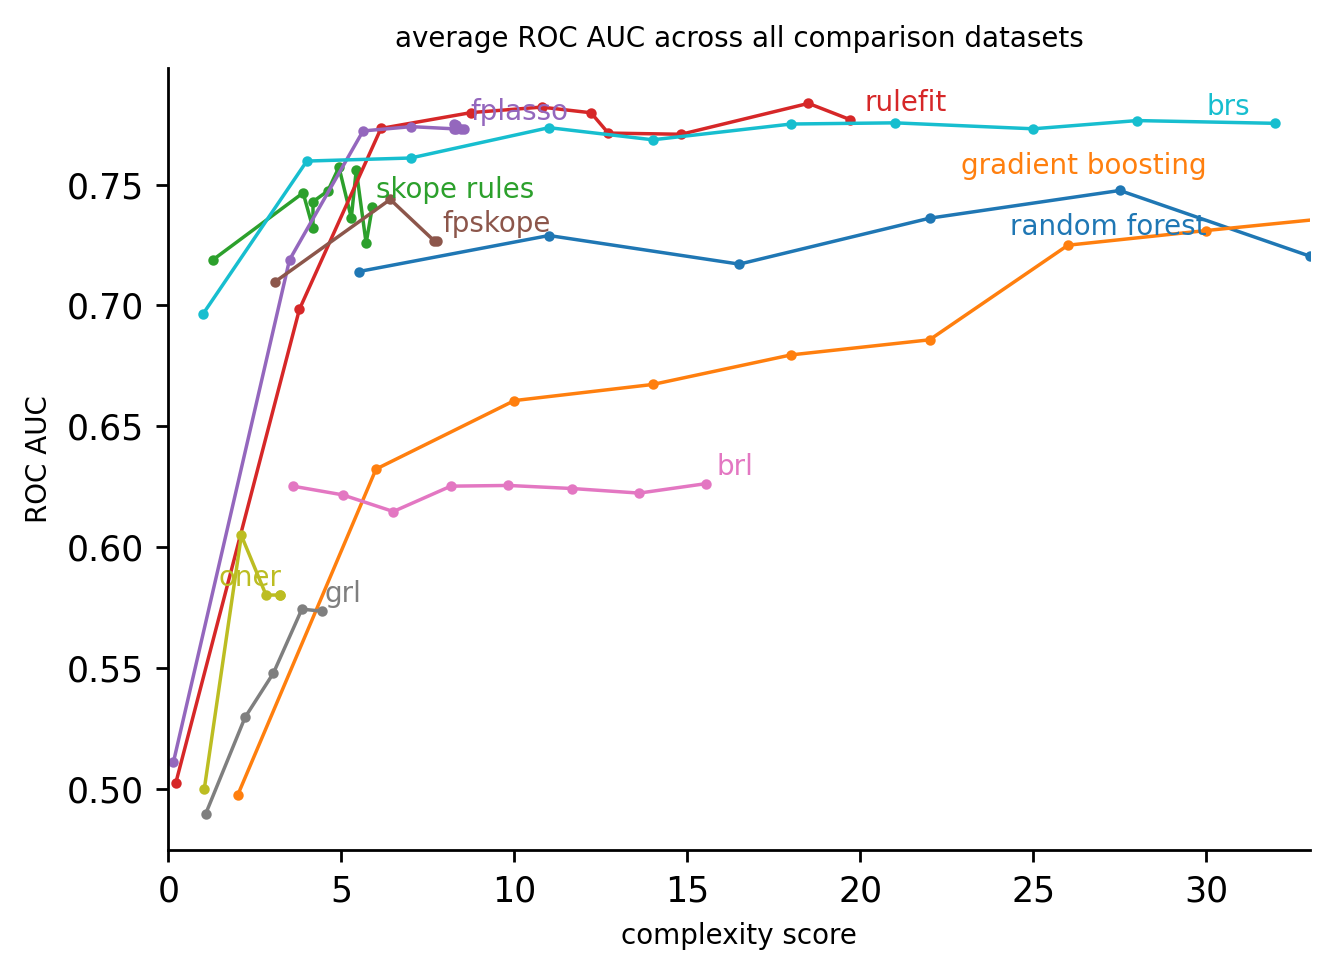

In [3]:
test_models = [
    'random_forest', 
    'gradient_boosting', 
    'skope_rules', 
    'rulefit', 
    'fplasso', 
    'fpskope',
    'brl',
    'grl',
    'oner',
    'brs']
test_results = [get_comparison_result(MODEL_COMPARISON_PATH, mname, test=True)
                for mname in test_models]
viz.viz_comparison_test_average(test_results)
plt.show()

**check individual datasets**

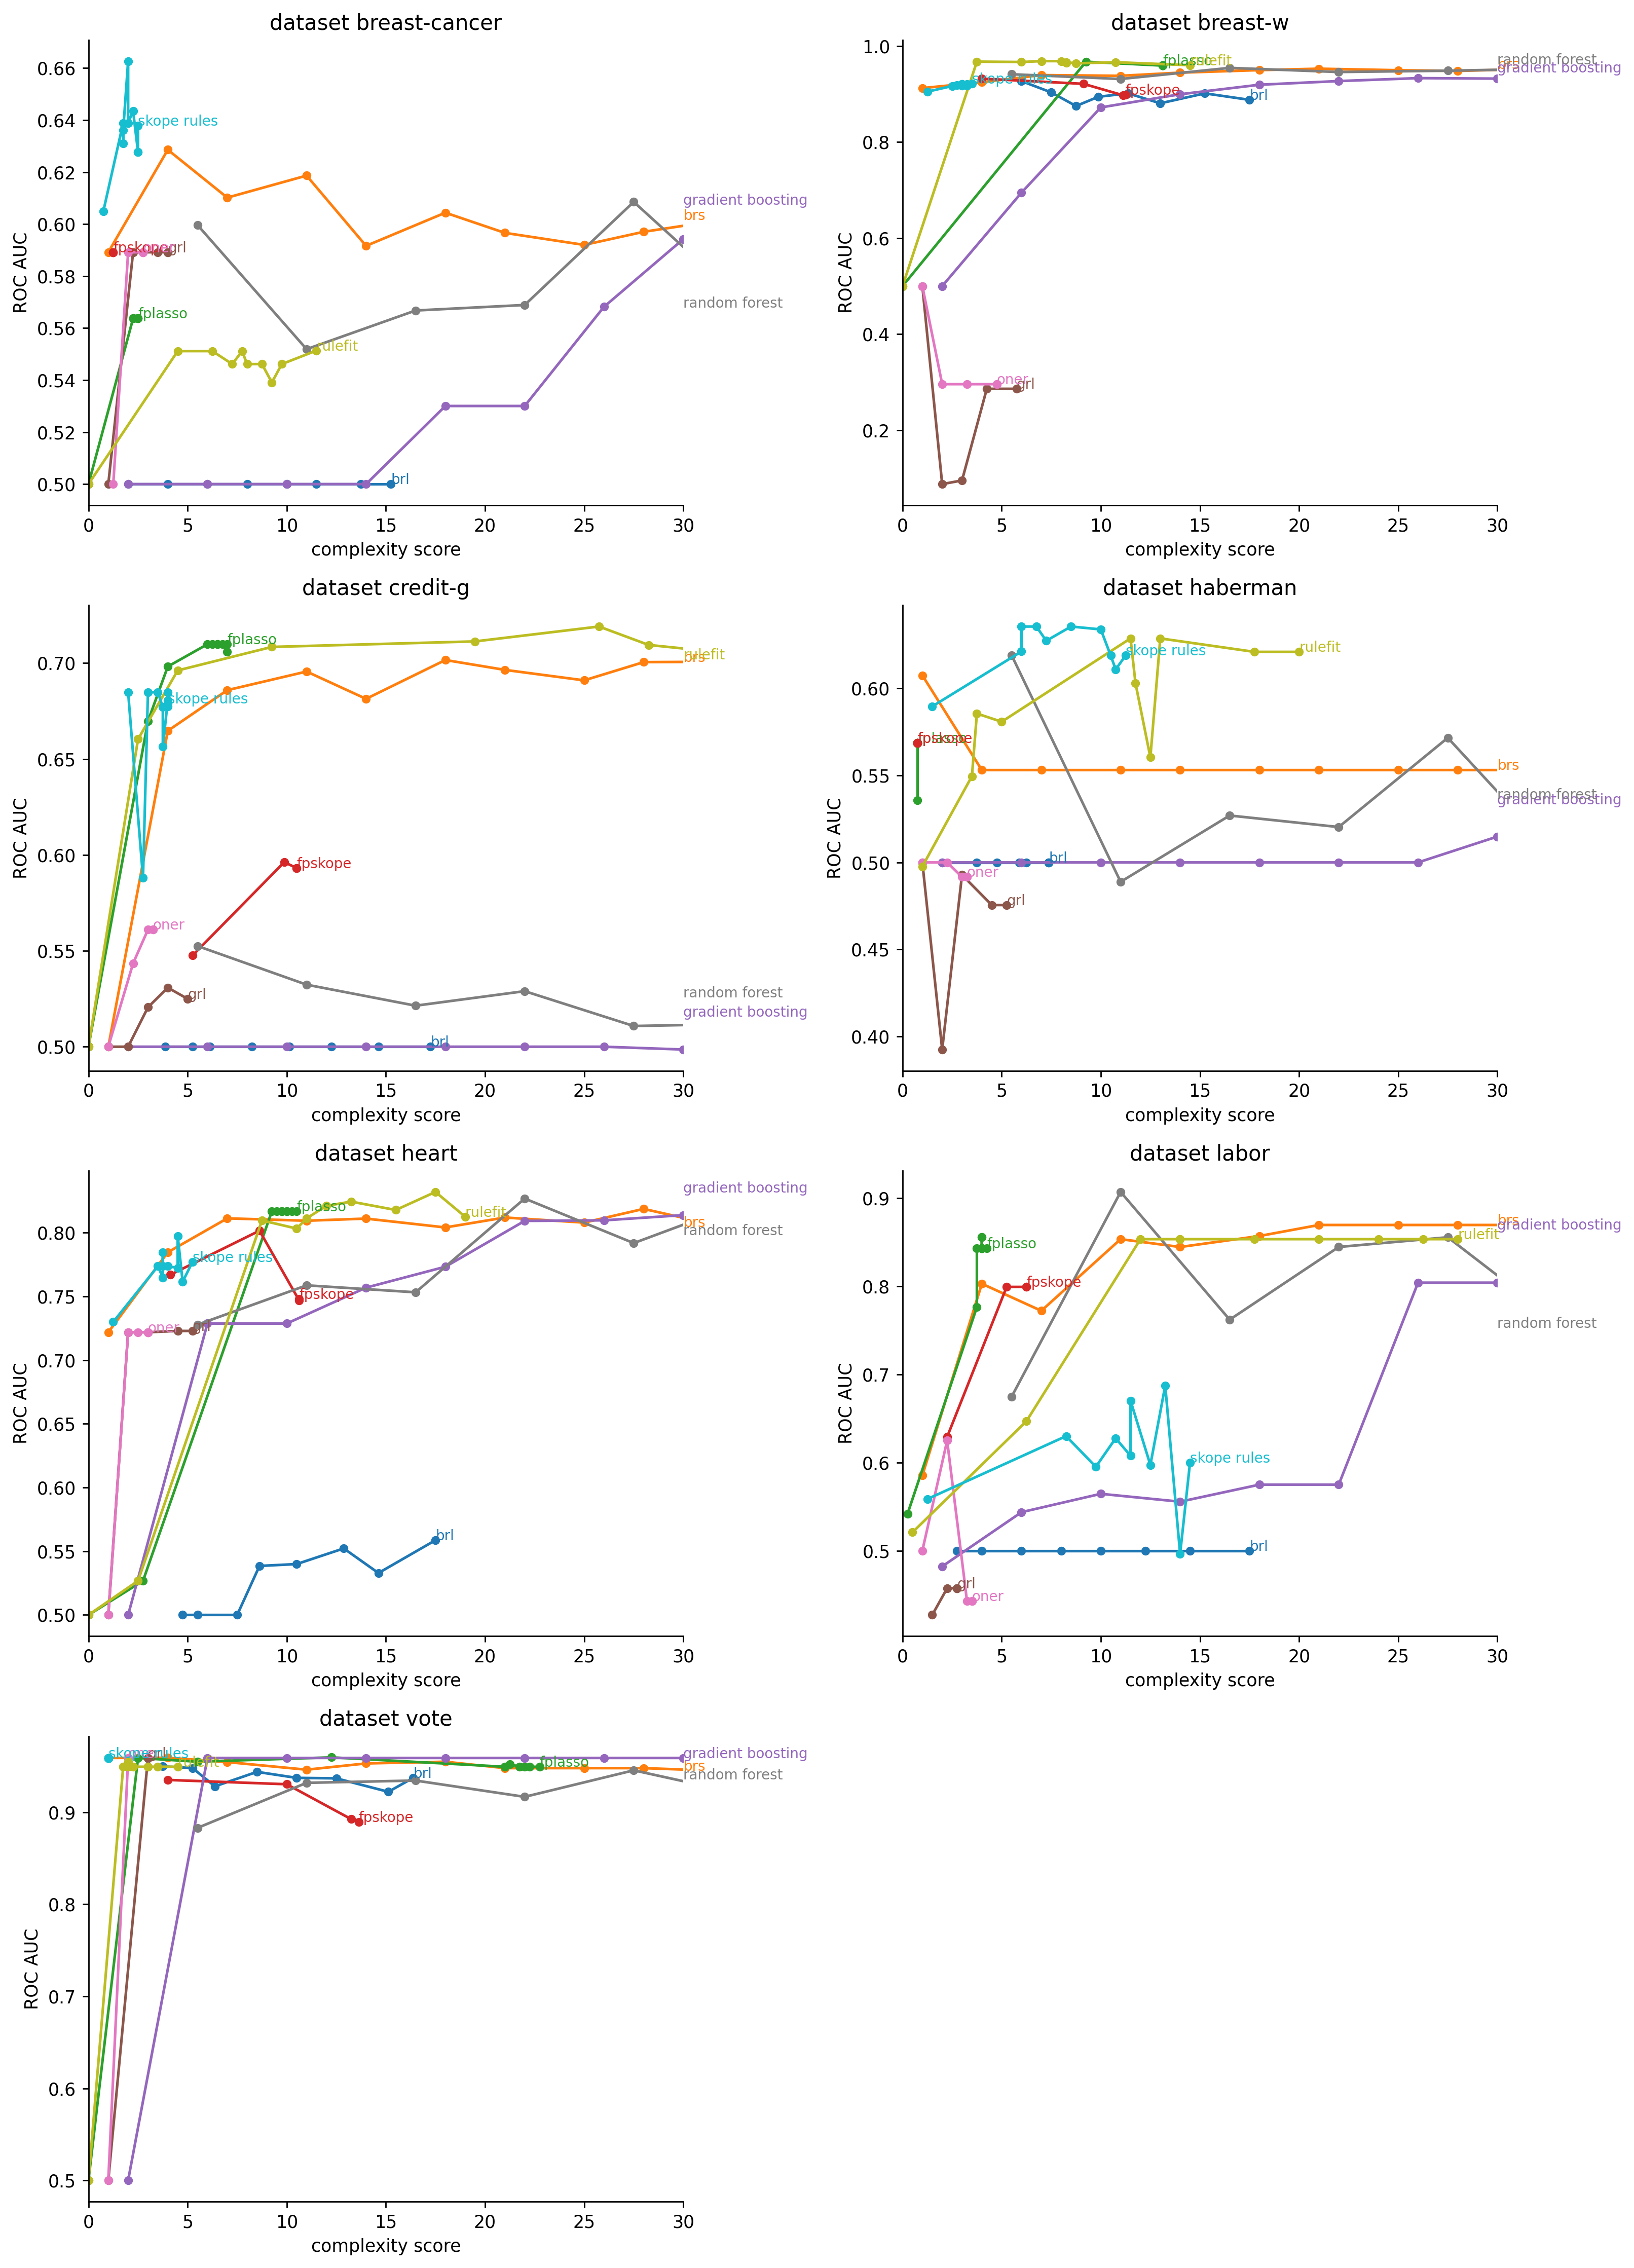

In [4]:
viz.viz_comparison_datasets(test_results, cols=2, figsize=(13, 18), test=True)
plt.show()

# check each model

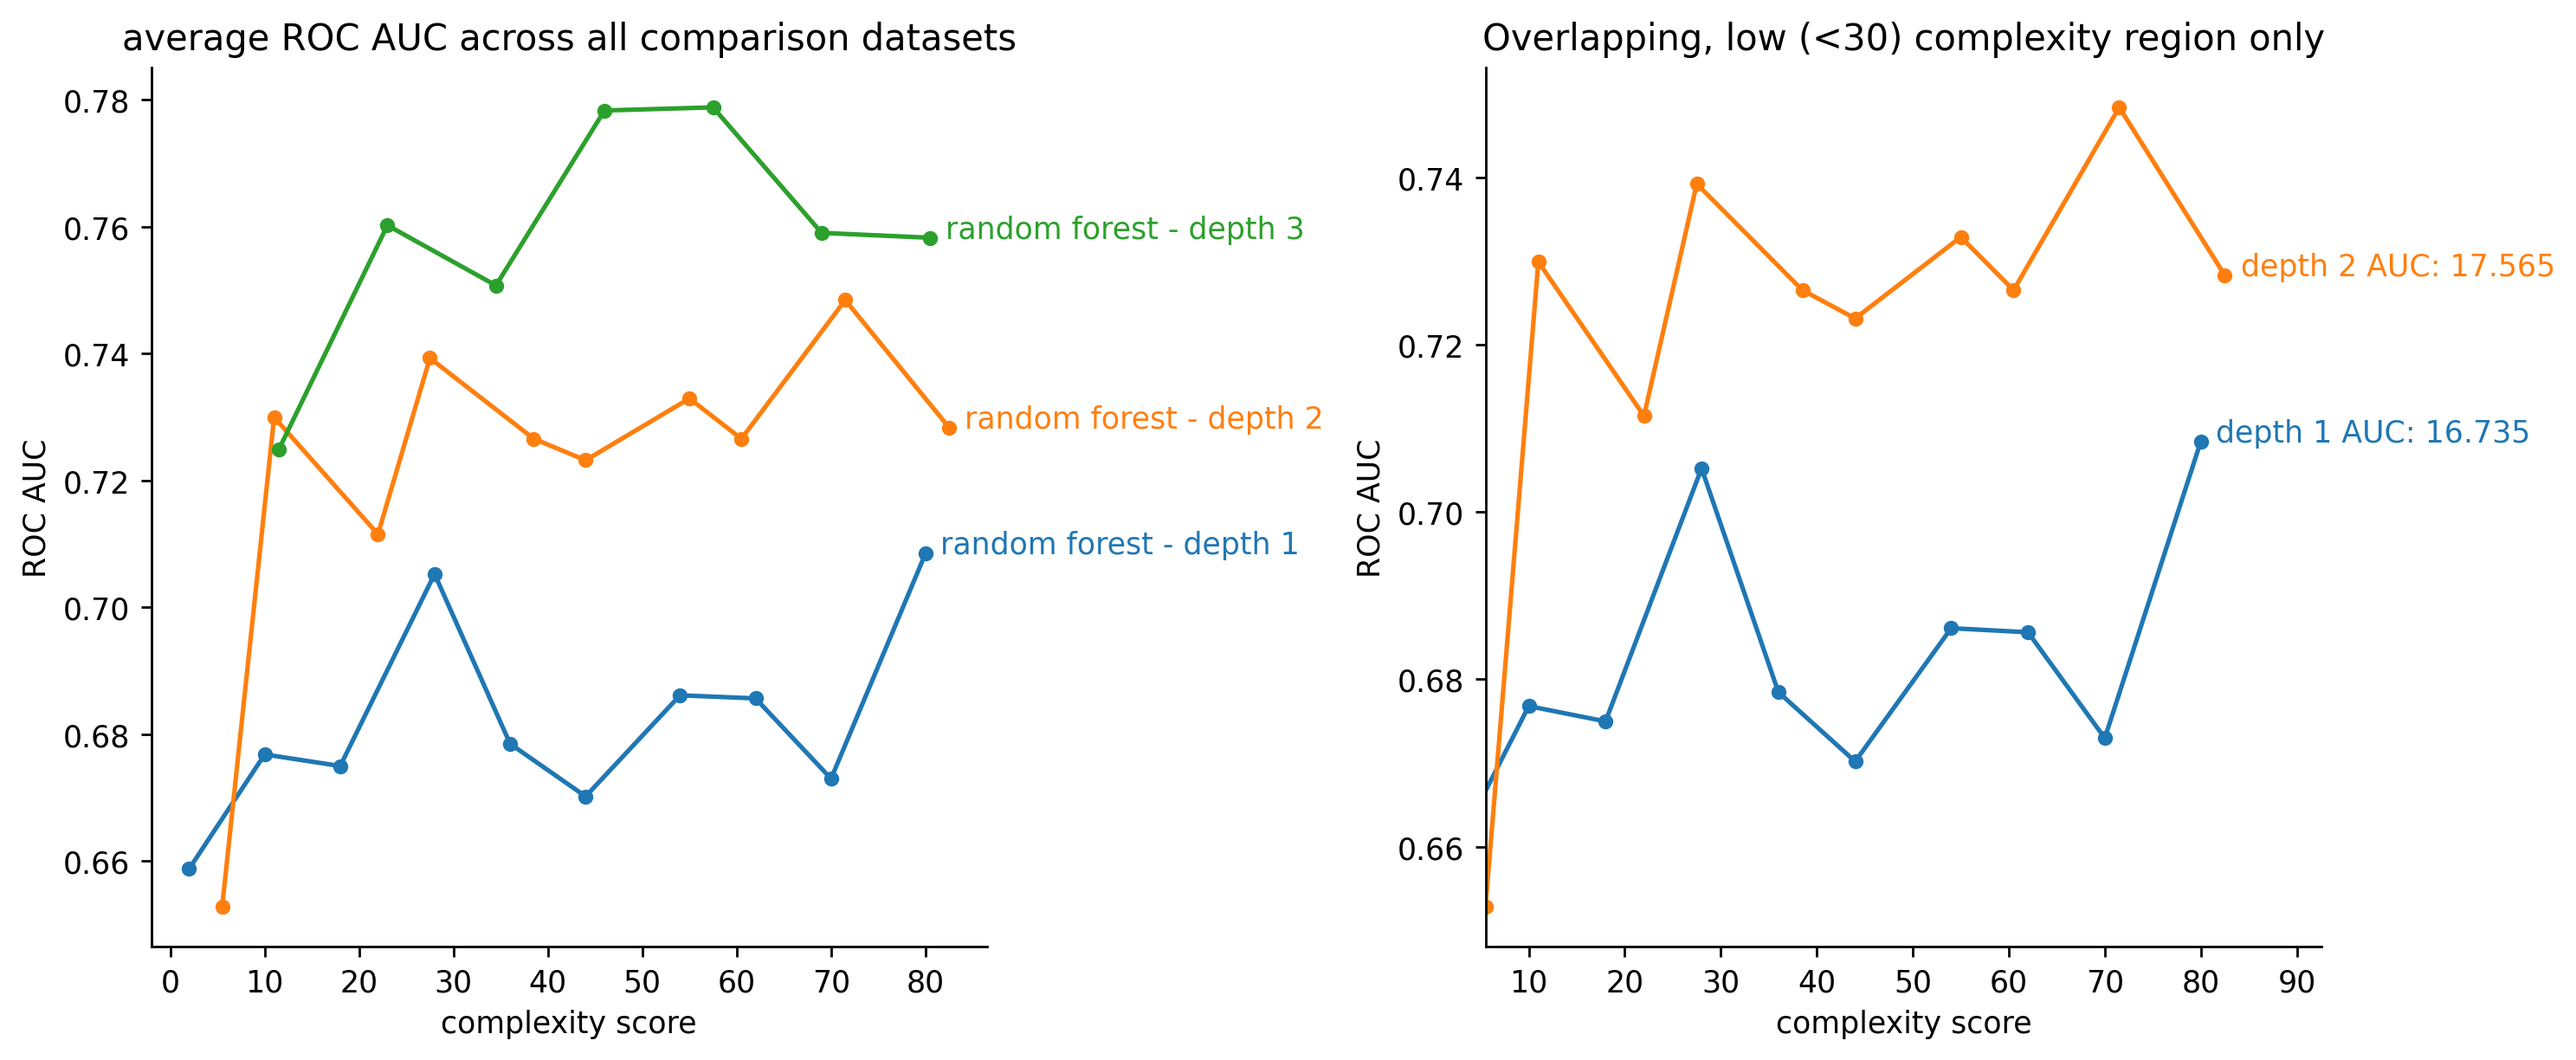

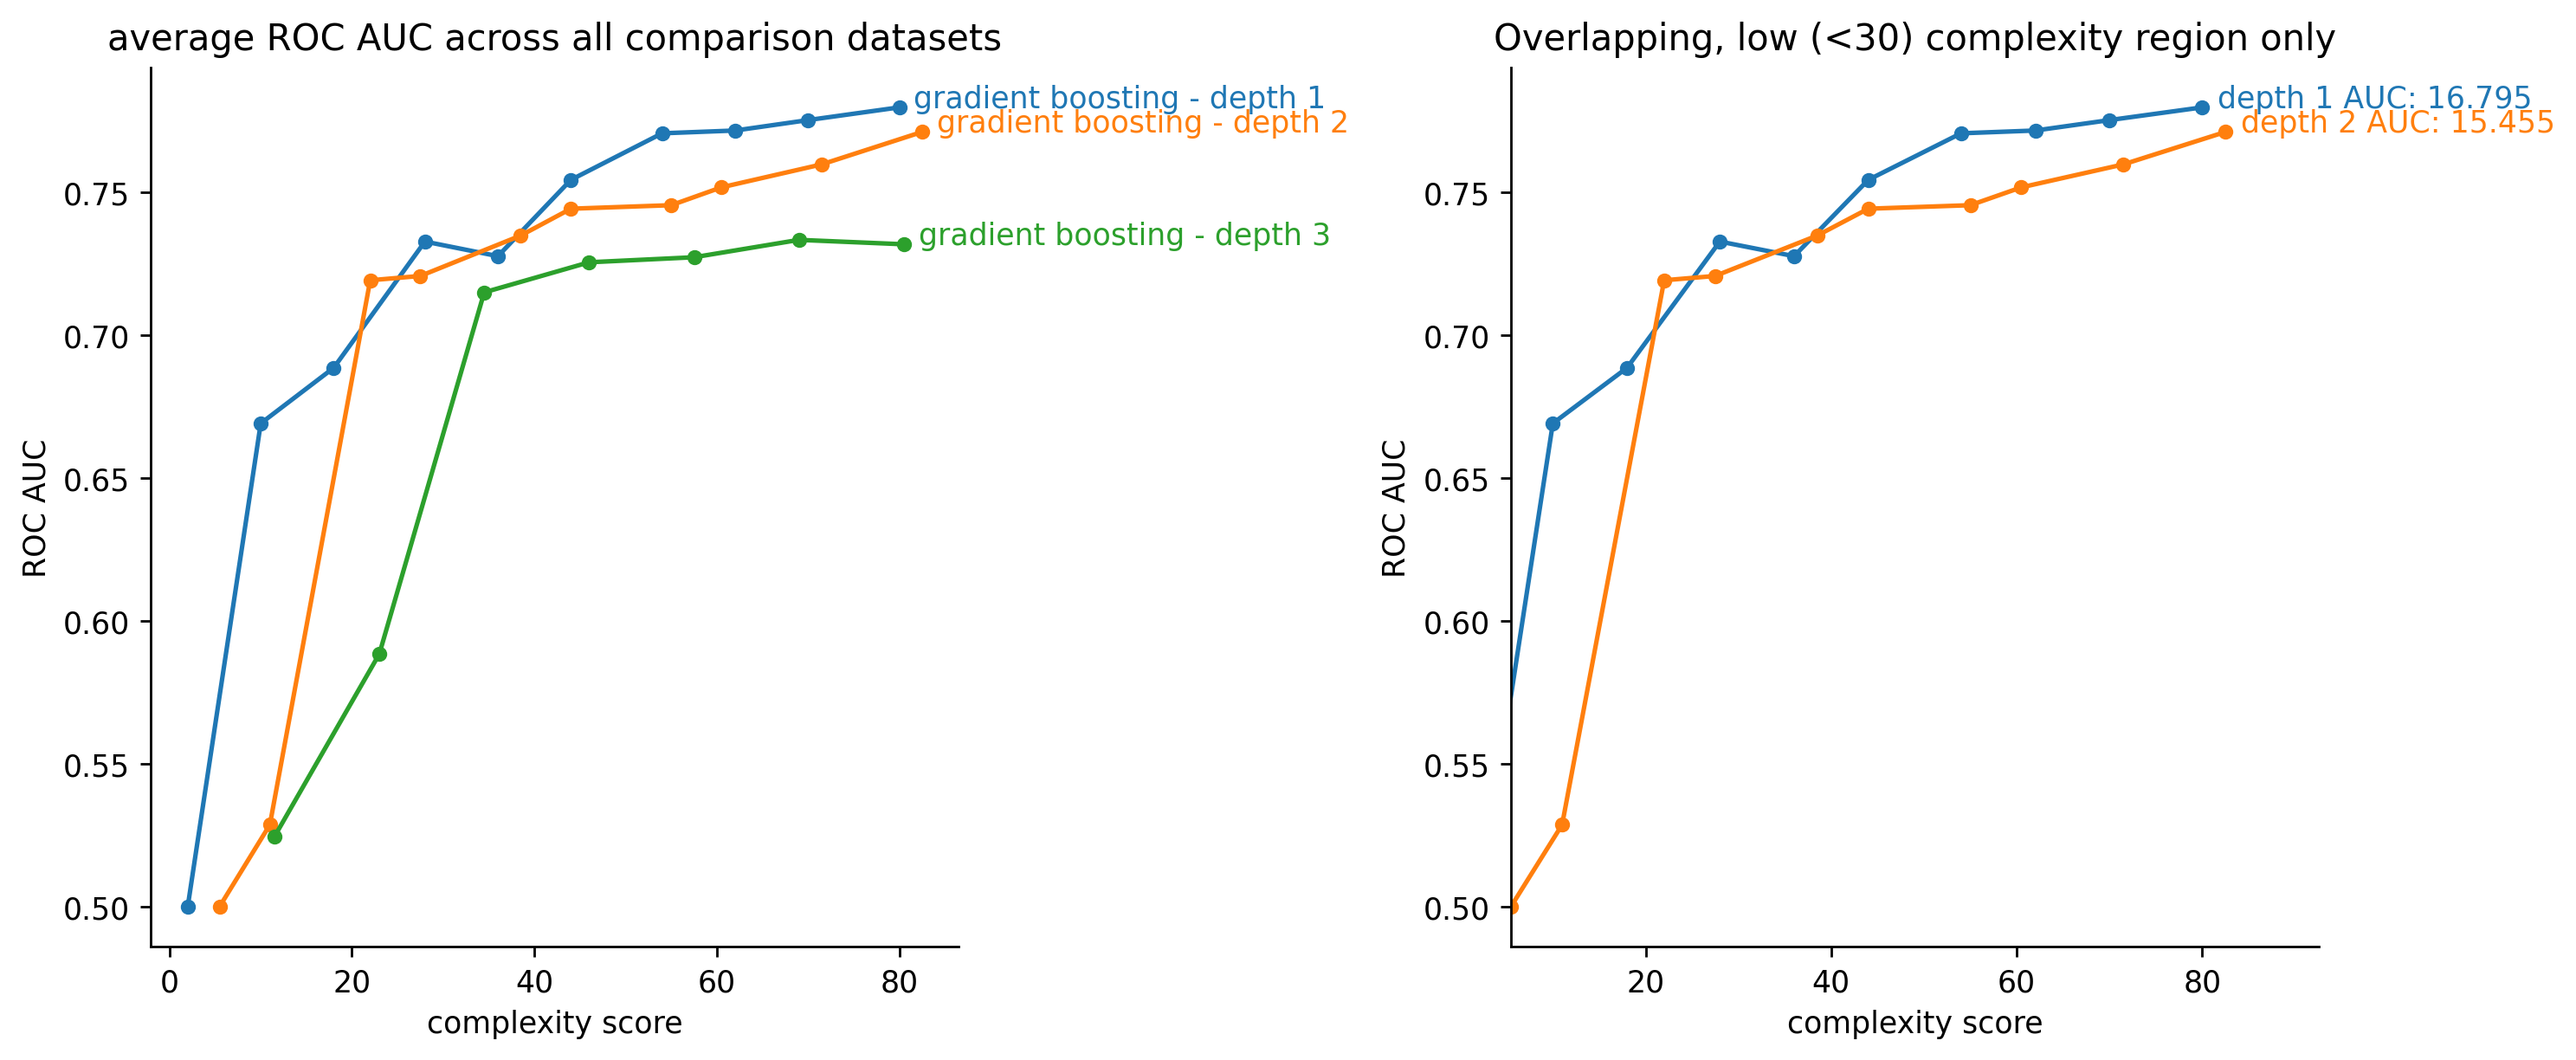

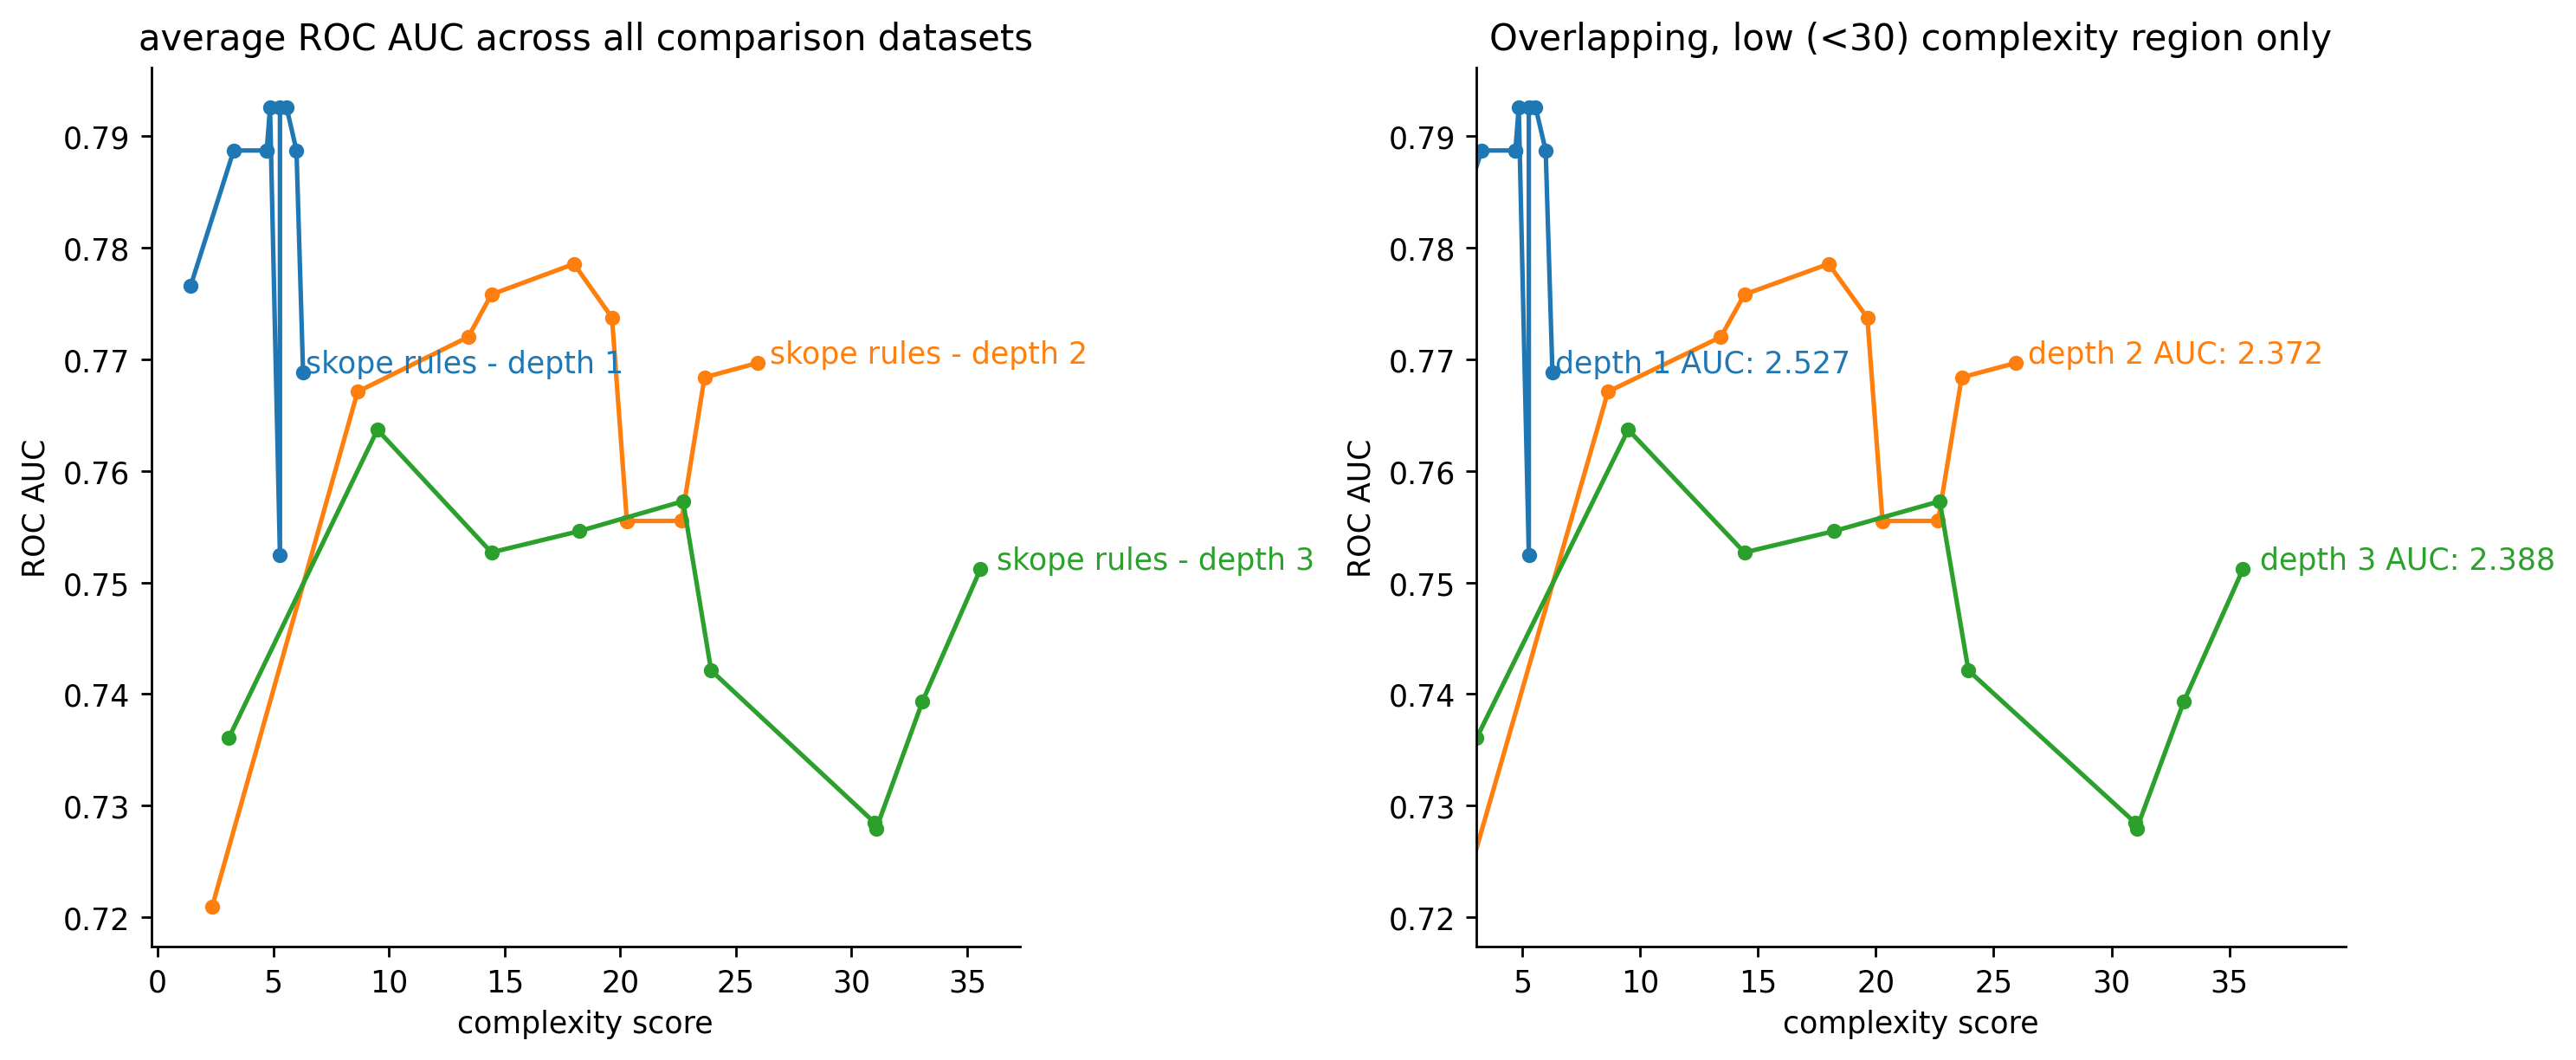

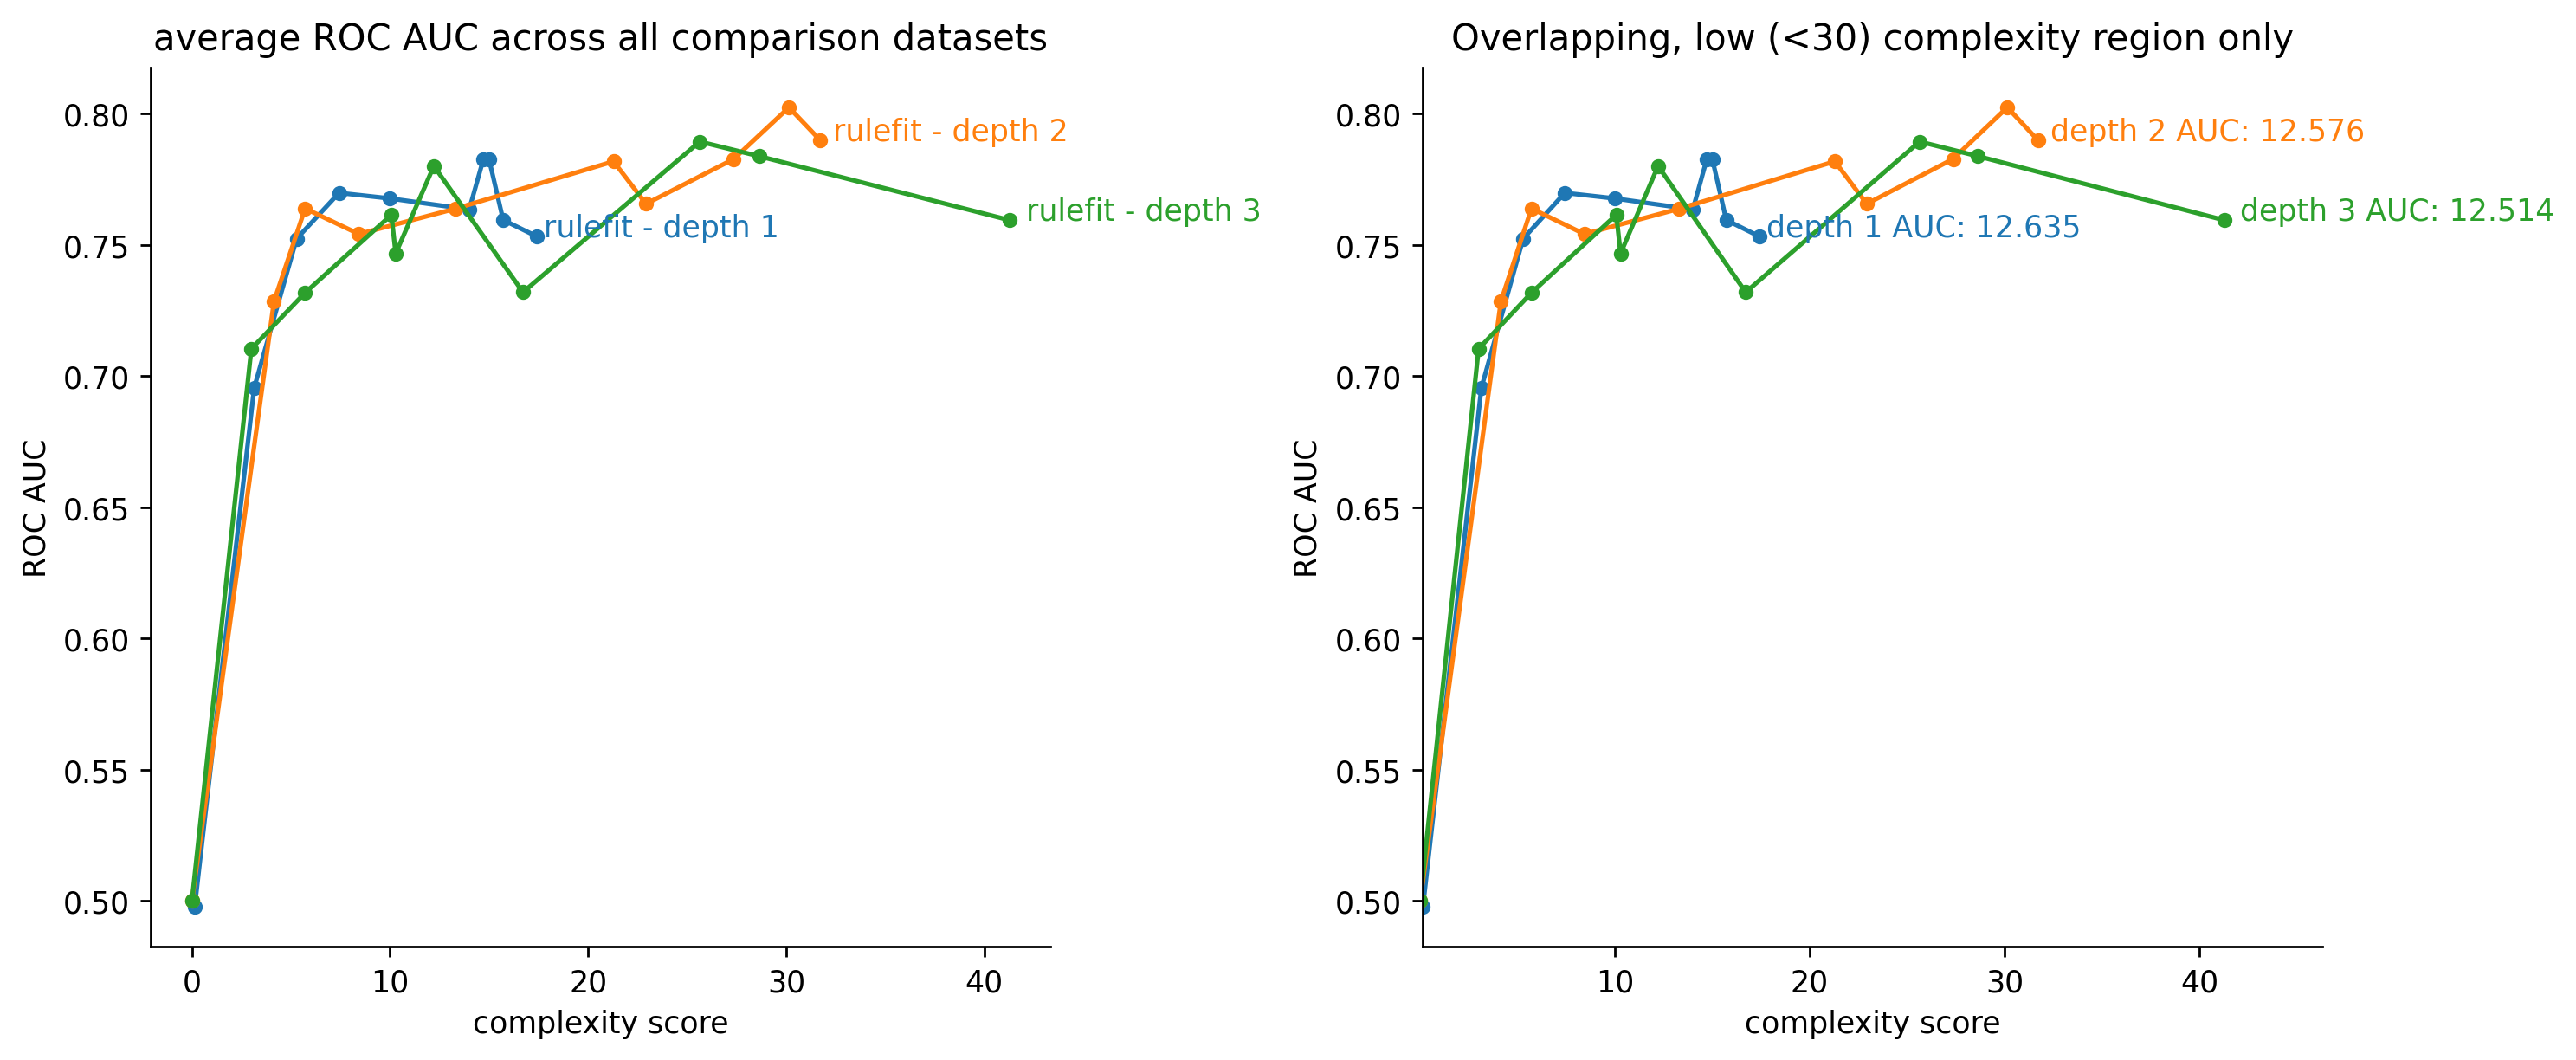

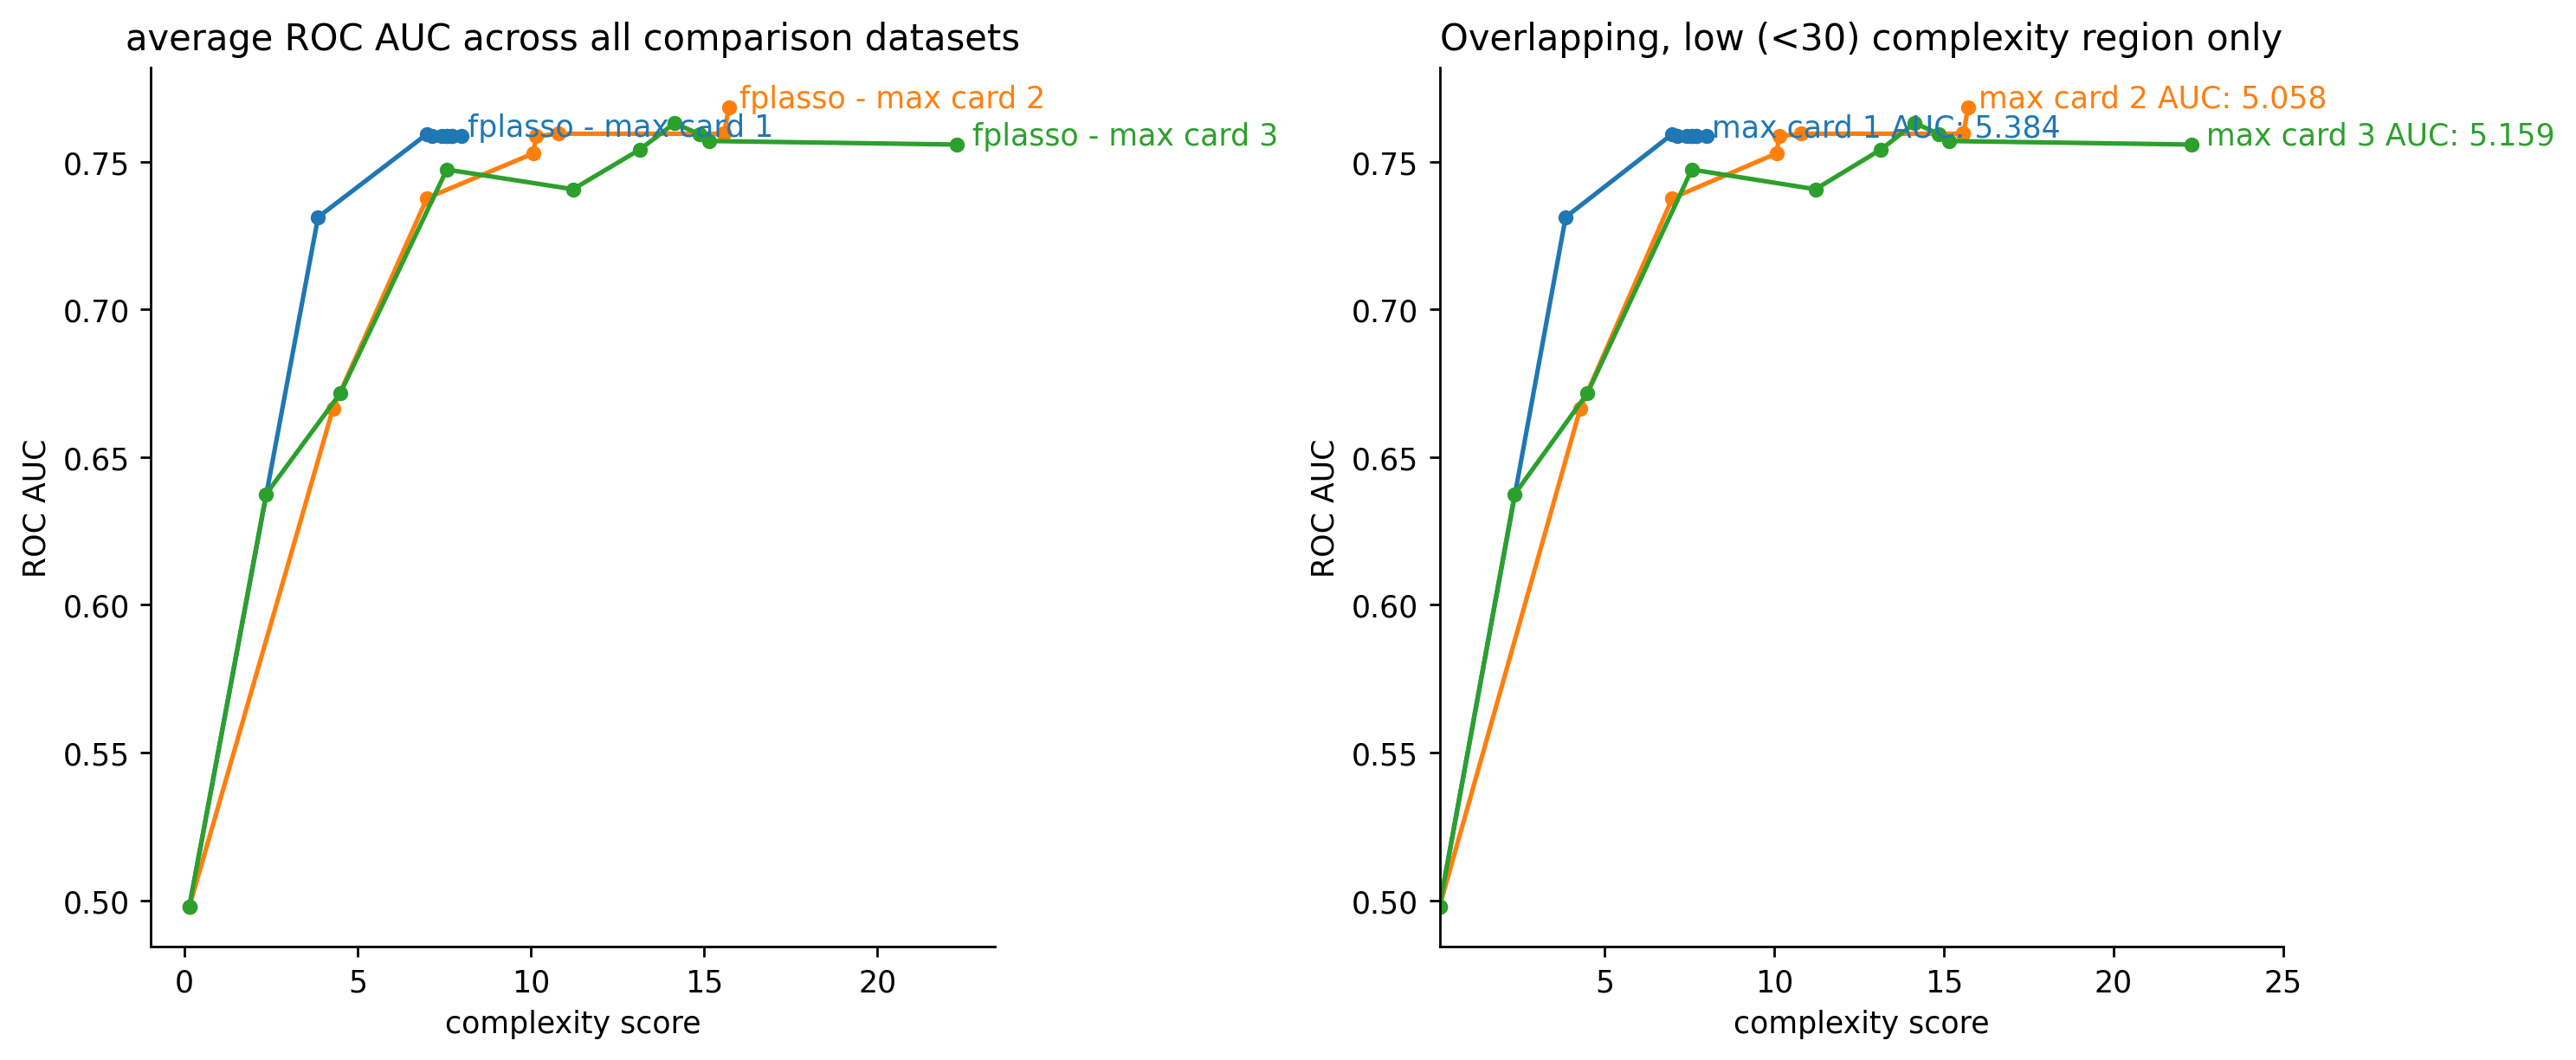

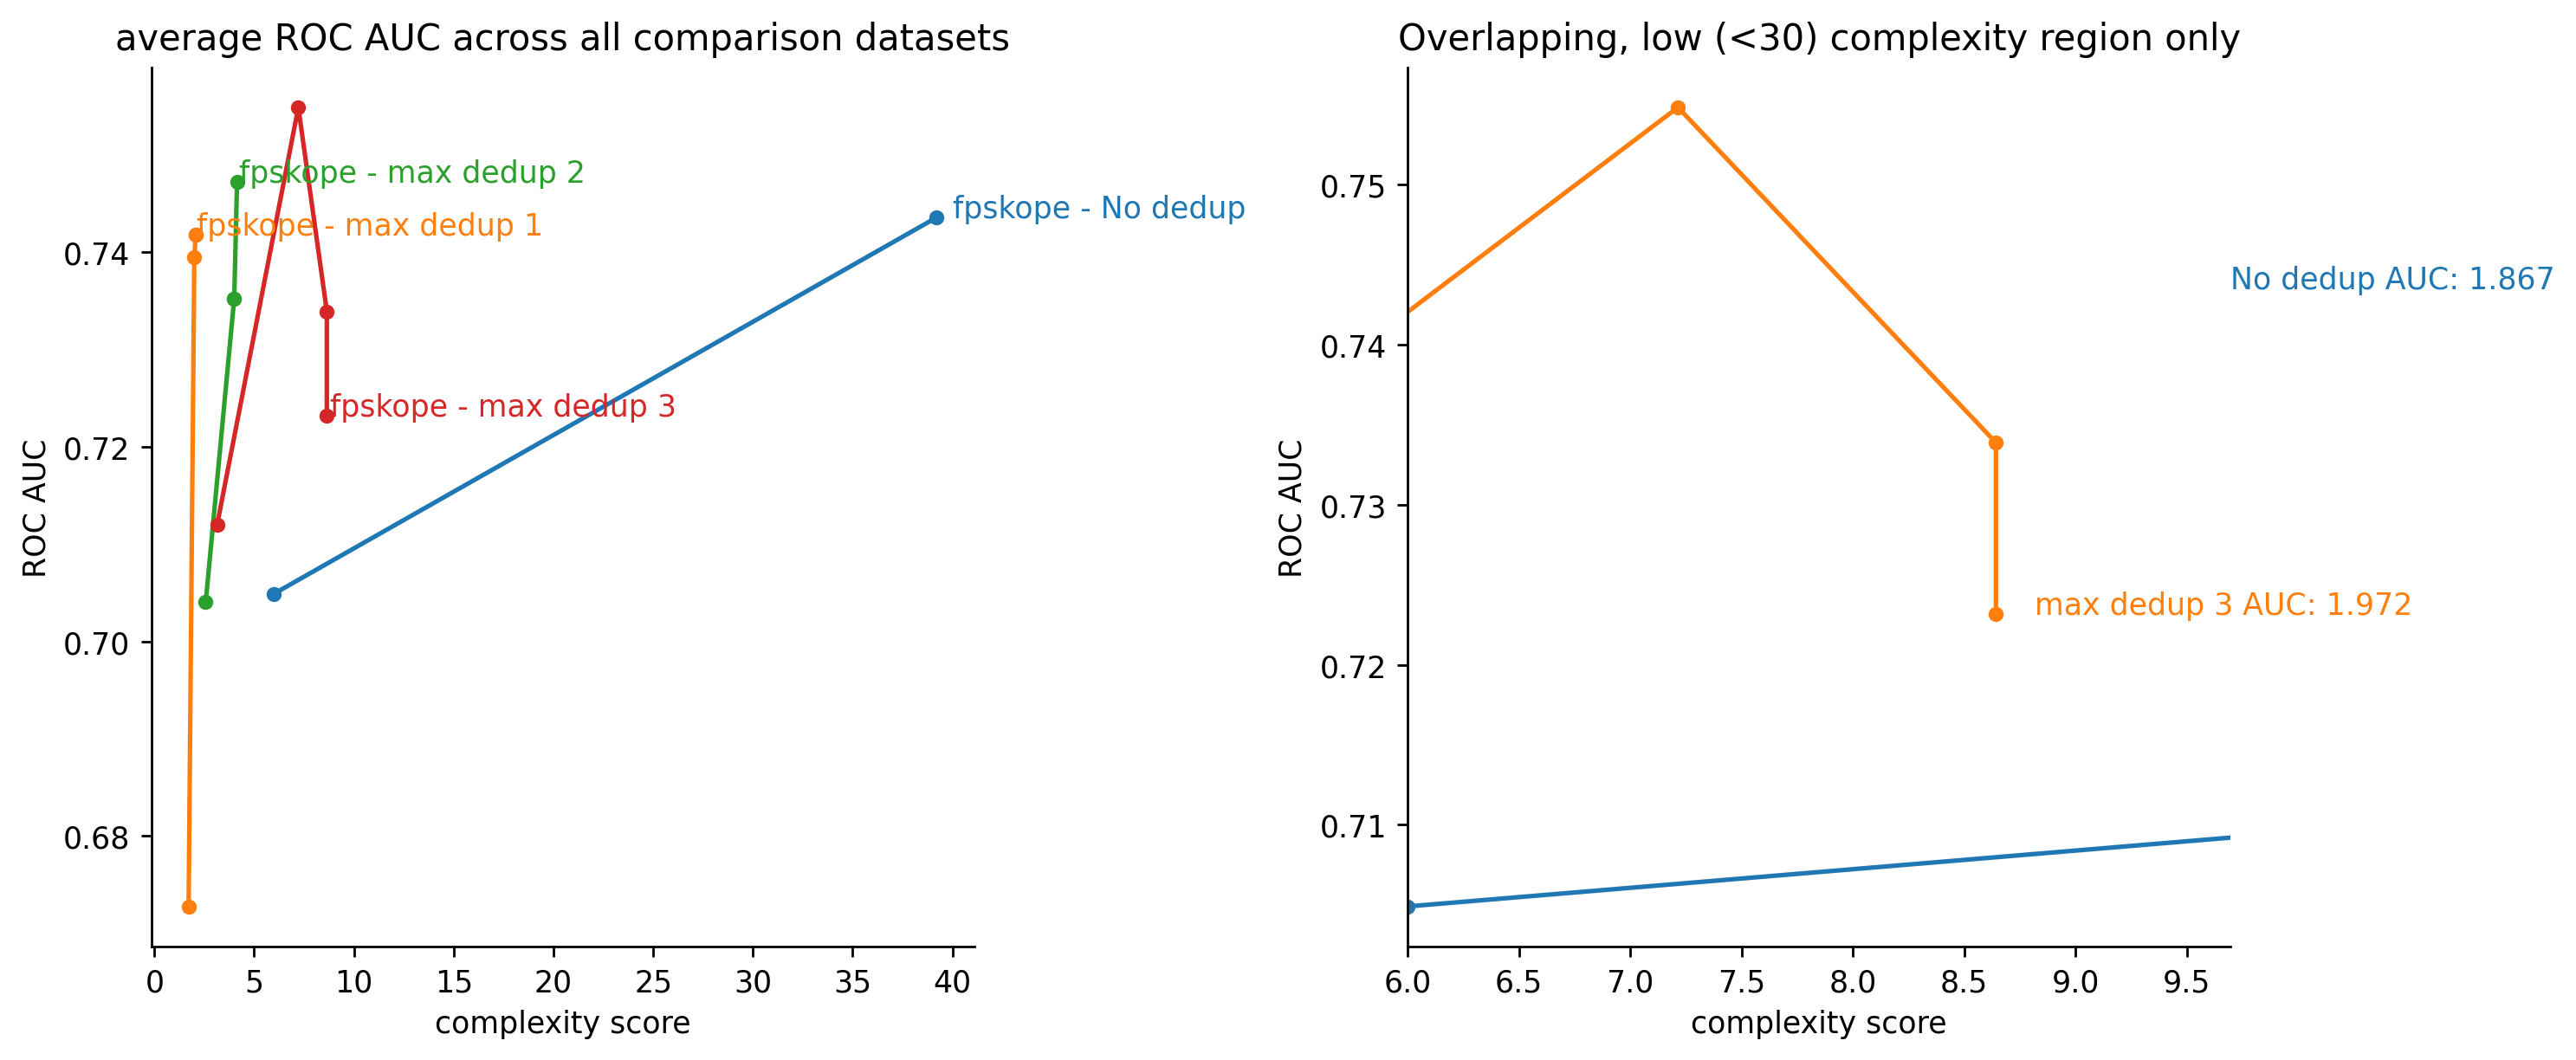

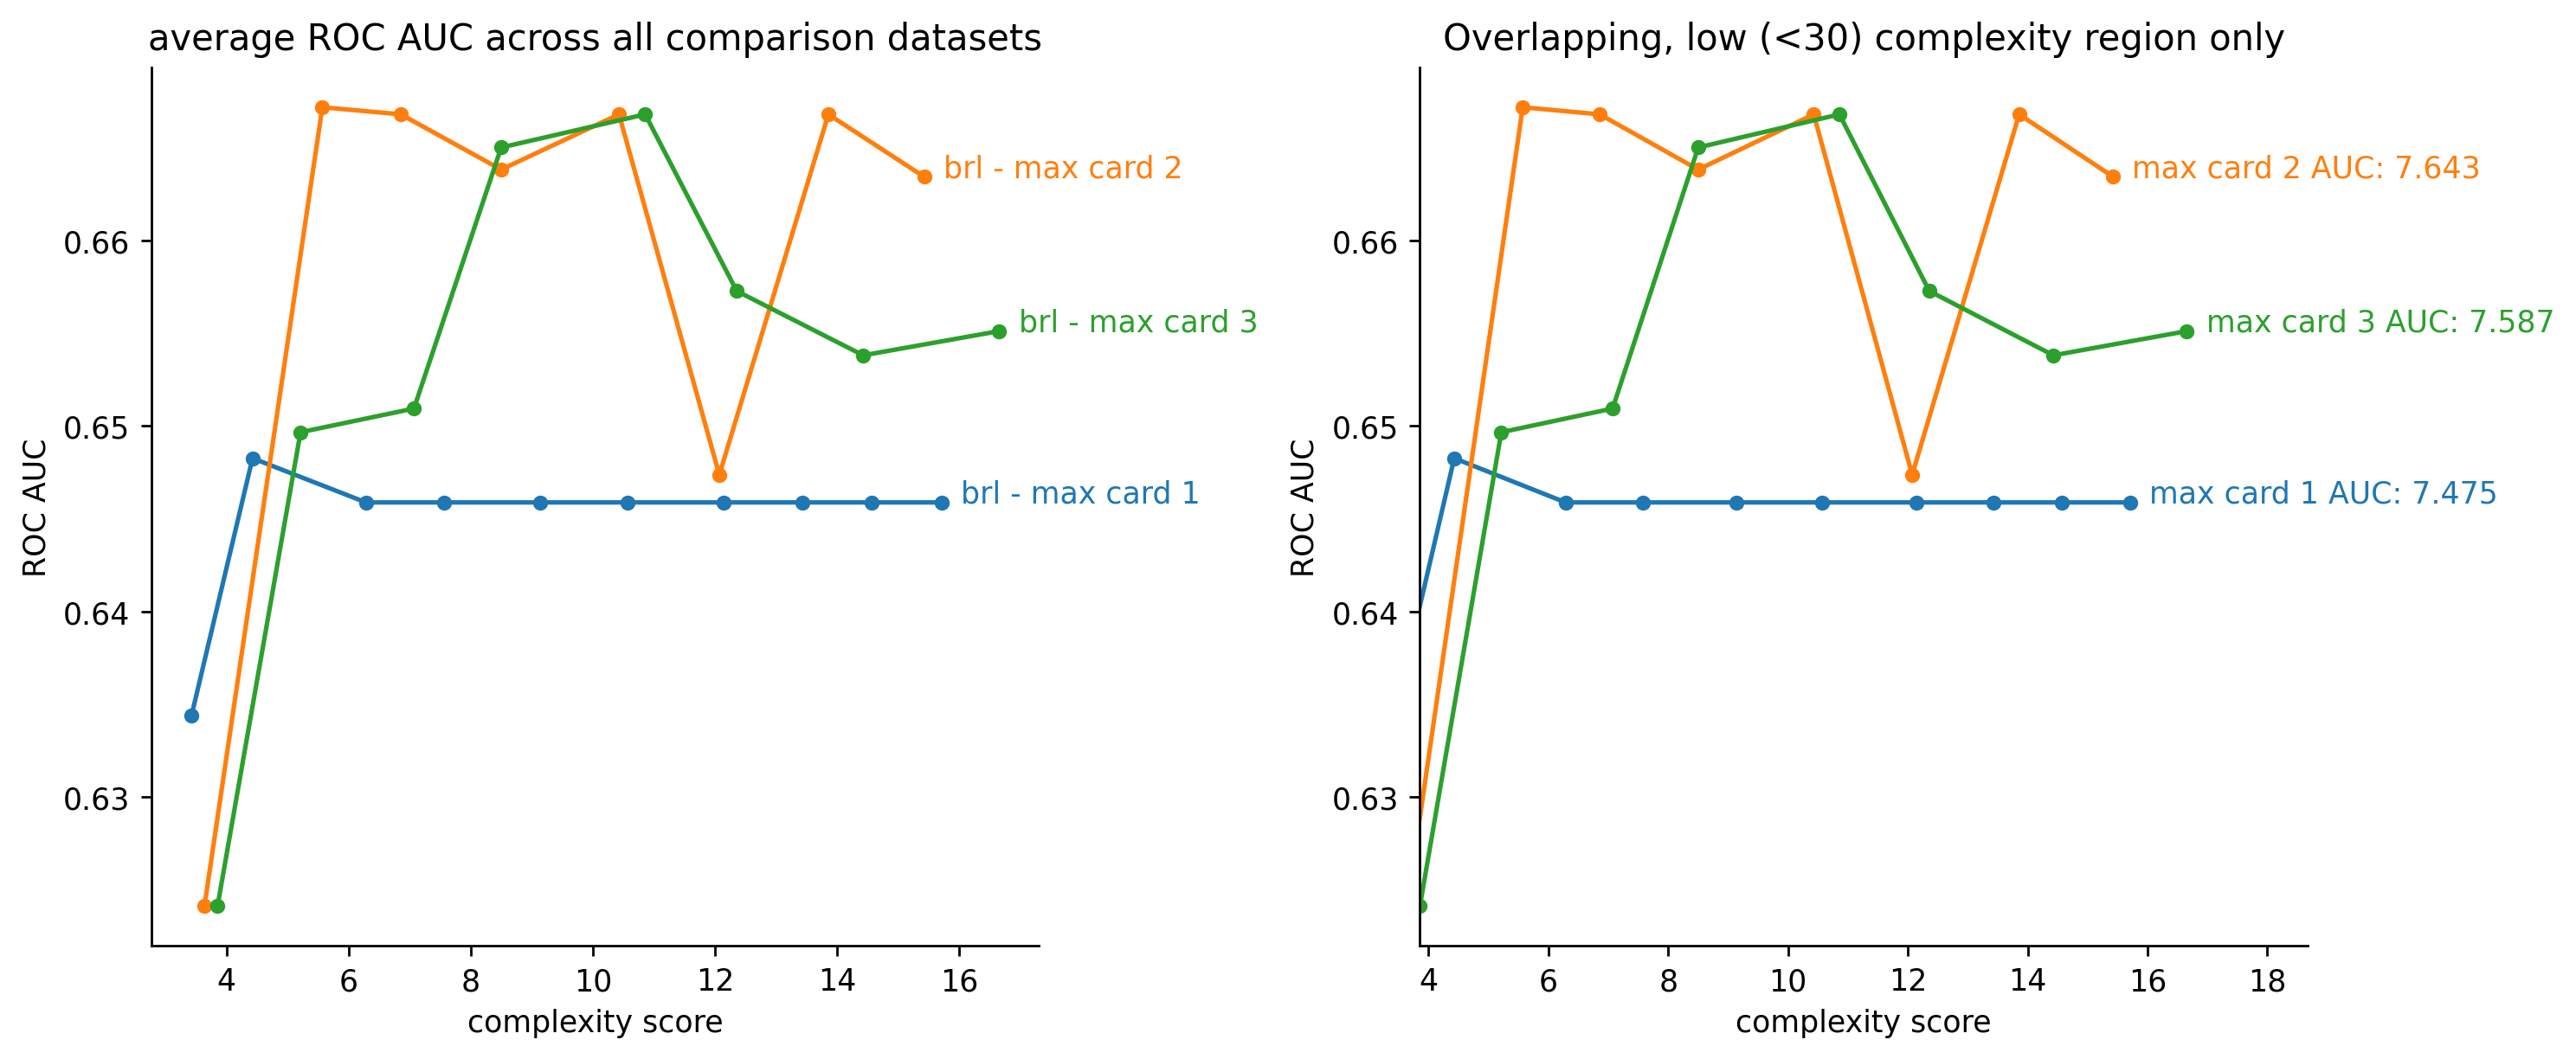

In [5]:
for model_name in ['random_forest', 'gradient_boosting', 'skope_rules', 
              'rulefit', 'fplasso', 'fpskope', 'brl']:
    comparison_result = get_comparison_result(MODEL_COMPARISON_PATH, model_name)
    viz.viz_comparison_val_average(comparison_result)
    plt.show()